<h1>
  <font color="red">Day 10 - Dự Án và Tình huống</font>
</h1>
<center>
<img height="400px" width="80%" src="https://i.pinimg.com/originals/60/69/06/6069060ed00f7ecc749c32a5dd84b188.gif" />
</center>

### Công ty ABC là một công ty thương mại điện tử, kinh doanh nhiều loại sản phẩm khác nhau từ điện tử, gia dụng, thời trang đến thực phẩm. Với dữ liệu doanh số bán hàng hàng tháng của một số sản phẩm trong năm vừa qua, công ty muốn phân tích hiệu suất kinh doanh, xác định các sản phẩm chính và dự báo doanh số cho tháng tiếp theo.


### 📈 Dữ Liệu Minh Họa:


| Tháng | Điện tử | Gia Dụng | Thời Trang | Thực Phẩm | Tổng Doanh Só
|-------|-------------|---------|---------|---------|---------|
| 1   | 10000         | 5000 | 15000 | 2000 | 32000|
| 2     | 12000         | 5500 | 15000 | 16000 | 36000|
| 3    | 13000         | 6000 | 17000 | 3000 | 39000|
| 4   | 10000         | 15000 | 15000 | 2000 | 32000|
| 5     | 2000         | 5500 | 15000 | 16000 | 36000|
| 6    | 19000         | 15000 | 17000 | 3000 | 39000|
| 7   | 22000         | 5000 | 15000 | 2000 | 32000|
| 8     | 78000         | 5500 | 15000 | 16000 | 36000|
| 9    | 11000         | 6000 | 17000 | 3000 | 39000|
| 10   | 13000         | 5000 | 15000 | 2000 | 32000|
| 11    | 12500         | 5500 | 15000 | 16000 | 36000|
| 12   | 13100         | 6000 | 17000 | 3000 | 39000|

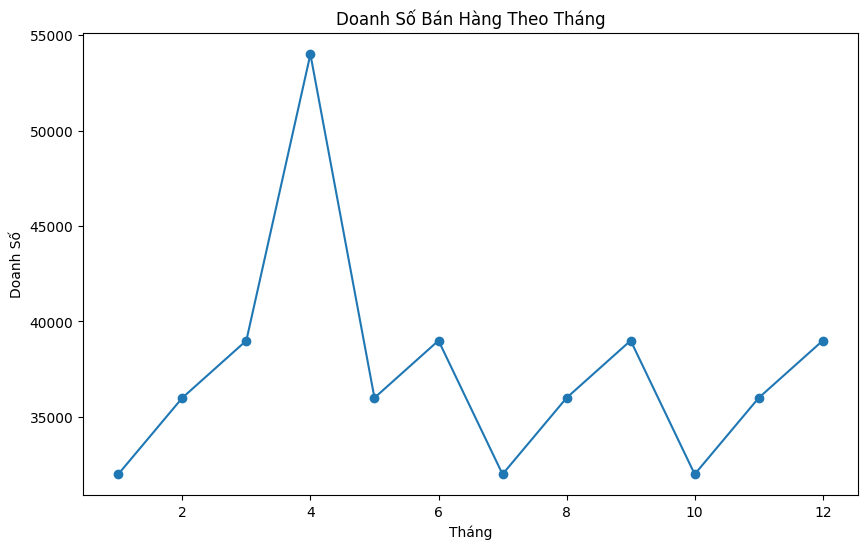

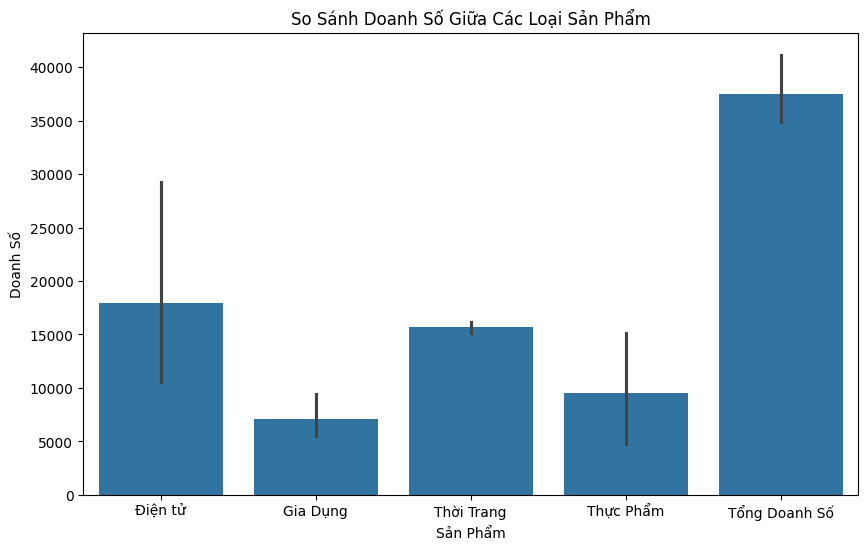

R-squared: 0.013380320466934492
MSE: 31325174.825174827
Doanh số dự báo cho tháng tiếp theo: 36272.72727272727


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Bước 1: Đọc và Xử Lý Dữ Liệu
df = pd.read_csv('data_ban_hang.csv')
df.fillna(method='ffill', inplace=True) # Điền dữ liệu thiếu

# Bước 2: Phân Tích và Trực Quan Hóa
plt.figure(figsize=(10, 6))
plt.plot(df['Tháng'], df['Tổng Doanh Số'], marker='o', linestyle='-')
plt.title('Doanh Số Bán Hàng Theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh Số')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=df.melt(id_vars=['Tháng'], var_name='Sản Phẩm', value_name='Doanh Số'), x='Sản Phẩm', y='Doanh Số')
plt.title('So Sánh Doanh Số Giữa Các Loại Sản Phẩm')
plt.show()


# Bước 3: Dự Báo Doanh Số
X = df.index.values.reshape(-1, 1) # Thời gian (Tháng)
y = df['Tổng Doanh Số'].values # Doanh số


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


# Đánh giá mô hình
print(f'R-squared: {r2_score(y, y_pred)}')
print(f'MSE: {mean_squared_error(y, y_pred)}')


# Dự báo doanh số cho tháng tiếp theo
next_month = np.array([[len(df)]])
predict_next_month = model.predict(next_month)
print(f'Doanh số dự báo cho tháng tiếp theo: {predict_next_month[0]}')


#### Dự án lần này sẽ tập trung vào việc phân tích ảnh hưởng của thời tiết và các sự kiện địa phương lên hành vi mua sắm của khách hàng trong lĩnh vực bán lẻ.

#### Dữ liệu Thời Tiết: Thông tin về nhiệt độ, lượng mưa, độ ẩm, vv., có thể được thu thập thông qua các API thời tiết như OpenWeatherMap, AccuWeather.

In [13]:
import pandas as pd
import requests
import json


# Thu thập dữ liệu thời tiết từ API
api_key = "02e5748b7141adced803174b32c29b0d"
city_name = "Ho Chi Minh"
api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}"
response = requests.get(api_url)
weather_data = json.loads(response.text)


# Tạo DataFrame từ dữ liệu thời tiết
weather_df = pd.DataFrame({
'Date': [pd.Timestamp.now().normalize()],
'Temperature': [weather_data['main']['temp']],
'Humidity': [weather_data['main']['humidity']],
'Precipitation': [weather_data['rain']['1h'] if 'rain' in weather_data else 0]
})


# Làm sạch và chuẩn bị dữ liệu
# Giả sử 'customer_data.csv' là tệp chứa dữ liệu khách hàng
customer_df = pd.read_csv('customer_data.csv')
customer_df['Purchase Date'] = pd.to_datetime(customer_df['Purchase Date'])
customer_df["Tháng"] = pd.to_datetime(customer_df["Purchase Date"]).dt.month


# Điền giá trị thiếu
customer_df.fillna(method='ffill', inplace=True)


# Gộp dữ liệu thời tiết vào dữ liệu khách hàng dựa trên ngày
final_df = pd.merge(customer_df, weather_df, left_on='Purchase Date', right_on='Date', how='left')


print(final_df.head())

  Purchase Date Sở thích mua hàng      Địa điểm mua hàng  Nhiệt độ  \
0    2024-06-22        Thời trang  Thành phố Hồ Chí Minh        28   
1    2024-06-22           Điện tử  Thành phố Hồ Chí Minh        28   
2    2024-01-22           Mỹ phẩm  Thành phố Hồ Chí Minh        28   
3    2024-01-23       Đồ gia dụng  Thành phố Hồ Chí Minh        29   
4    2024-02-23         Thực phẩm  Thành phố Hồ Chí Minh        29   

   Lượng mưa (mm) Sự kiện địa phương    Sales  Số Khách Hàng  Số Sự Kiện  \
0               3      Lễ hội Áo dài  1000000            900           1   
1               0      Lễ hội Áo dài   800000            200           3   
2               0      Lễ hội Áo dài   600000             22          12   
3               1      Lễ hội Áo dài   500000             22           2   
4               1      Lễ hội Áo dài   400000             22           4   

   Tháng Date  Temperature  Humidity  Precipitation  
0      6  NaT          NaN       NaN            NaN  
1      6  NaT 

<ipython-input-13-14b44762e683>:26: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_df['Purchase Date'] = pd.to_datetime(customer_df['Purchase Date'])


## Biểu Đồ Đường Xu Hướng Khách Hàng

In [14]:
summary = final_df.groupby('Tháng', as_index=False).sum()
summary

<ipython-input-14-3d1092eab620>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary = final_df.groupby('Tháng', as_index=False).sum()


,Tháng,Nhiệt độ,Lượng mưa (mm),Sales,Số Khách Hàng,Số Sự Kiện,Temperature,Humidity,Precipitation
0,1,198,2,4790000,519,44,0.0,0.0,0.0
1,2,336,12,3600000,861,195,0.0,0.0,0.0
2,3,212,4,6400000,531,11,0.0,0.0,0.0
3,6,113,4,2900000,1300,6,0.0,0.0,0.0
4,8,141,1,2990000,409,48,0.0,0.0,0.0


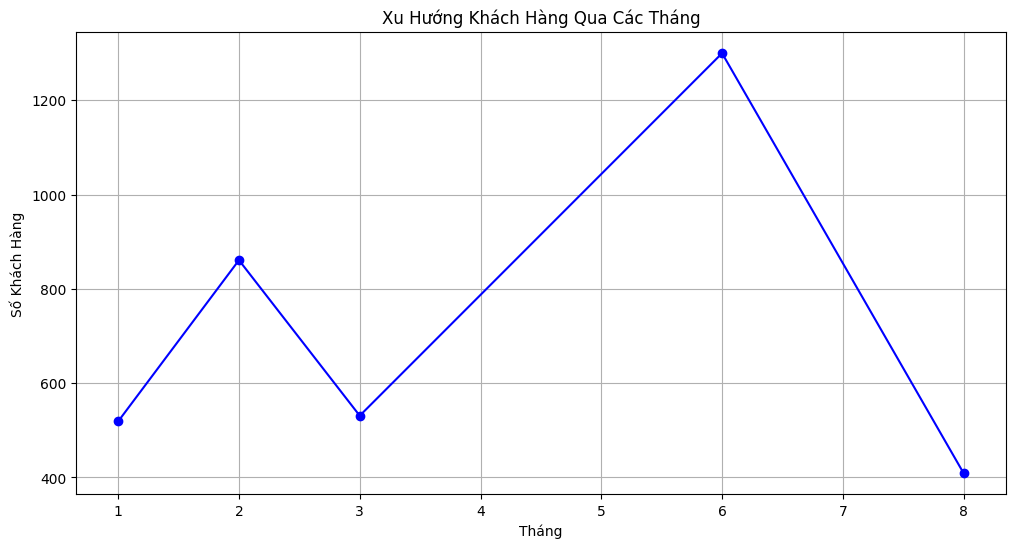

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Giả sử 'data' là DataFrame chứa dữ liệu đã được chuẩn bị
# Vẽ biểu đồ đường xu hướng khách hàng qua các tháng sử dụng Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(summary['Tháng'], summary['Số Khách Hàng'], marker='o', linestyle='-', color='b')
plt.title('Xu Hướng Khách Hàng Qua Các Tháng')
plt.xlabel('Tháng')
plt.ylabel('Số Khách Hàng')
plt.grid(True)
plt.show()

<ipython-input-16-7c2f3f342abf>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary = final_df.groupby('Sự kiện địa phương', as_index=False).sum()


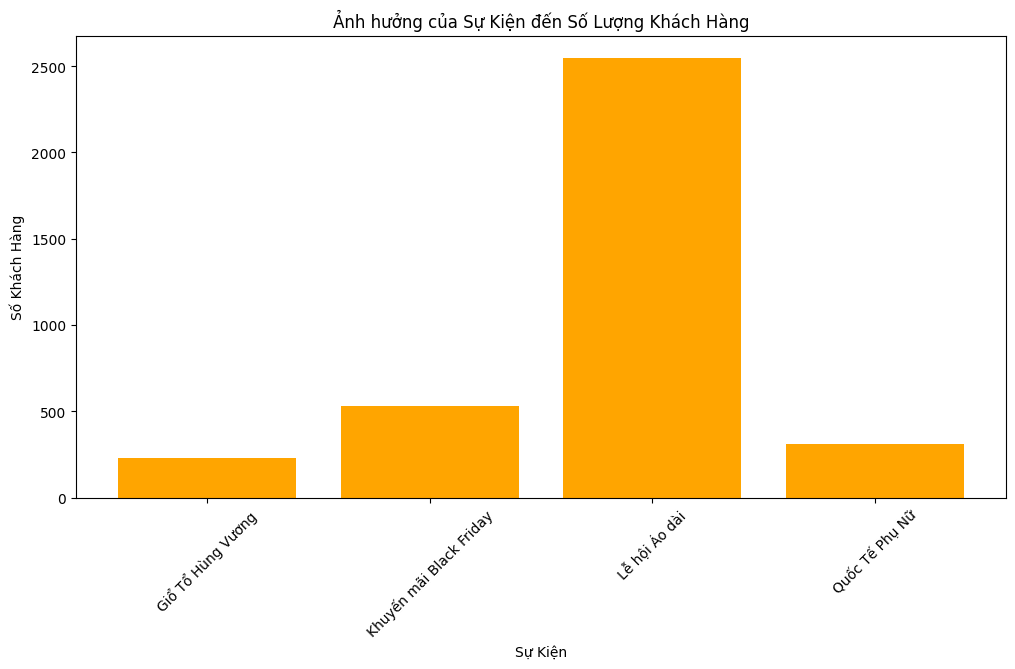

In [16]:
# Giả sử 'event_data' là DataFrame chứa thông tin về sự kiện và số lượng khách hàng
# Vẽ biểu đồ cột ảnh hưởng của sự kiện đến số lượng khách hàng sử dụng Matplotlib
summary = final_df.groupby('Sự kiện địa phương', as_index=False).sum()
summary

plt.figure(figsize=(12, 6))
plt.bar(summary['Sự kiện địa phương'], summary['Số Khách Hàng'], color='orange')
plt.title('Ảnh hưởng của Sự Kiện đến Số Lượng Khách Hàng')
plt.xlabel('Sự Kiện')
plt.ylabel('Số Khách Hàng')
plt.xticks(rotation=45)
plt.show()


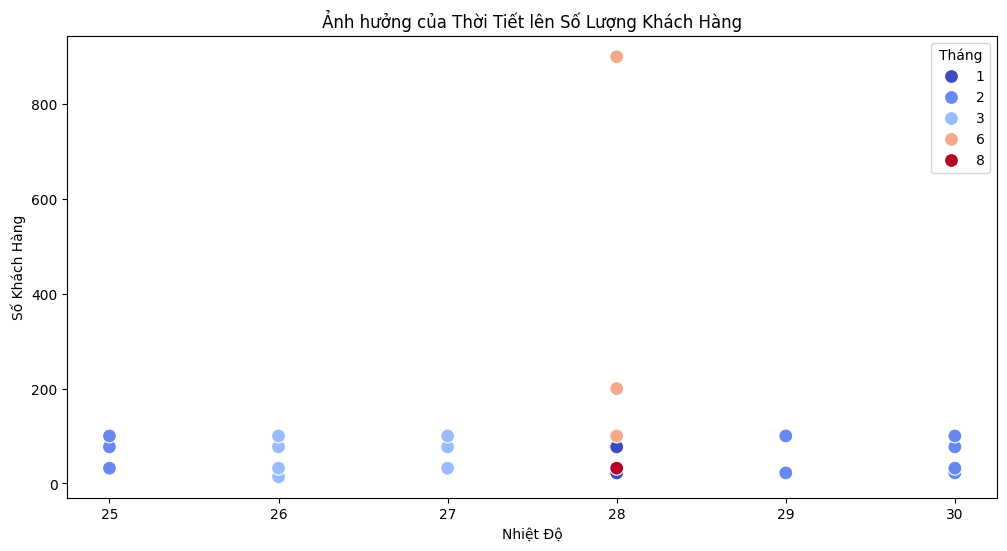

In [19]:
# Vẽ biểu đồ phân tán ảnh hưởng của thời tiết sử dụng Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_df, x='Nhiệt độ', y='Số Khách Hàng', hue='Tháng', palette='coolwarm', s=100)
plt.title('Ảnh hưởng của Thời Tiết lên Số Lượng Khách Hàng')
plt.xlabel('Nhiệt Độ')
plt.ylabel('Số Khách Hàng')
plt.show()


## Dự Báo Số Lượng Khách Hàng



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Giả sử 'data' là DataFrame đã được chuẩn bị, chứa số lượng khách hàng và các yếu tố như tháng, nhiệt độ, số sự kiện
final_df.fillna(method='ffill', inplace=True)

X = final_df[['Tháng', 'Nhiệt độ', 'Số Sự Kiện']] # Biến độc lập
y = final_df['Số Khách Hàng'] # Biến phụ thuộc

X

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


# Dự báo số lượng khách hàng
y_pred = model.predict(X_test)


# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


# Sử dụng mô hình để dự báo
new_data = [[5, 25, 2]] # Tháng 5, nhiệt độ 25 độ C, 2 sự kiện
predicted_customers = model.predict(new_data)
print(f'Số lượng khách hàng dự báo: {predicted_customers[0]}')


RMSE: 30.265983775401516
R-squared: -0.7796164747941456
Số lượng khách hàng dự báo: 83.88623696454505


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
